### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading datasets

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Stats and Analysis

In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


* There are 7 columns of numeric data --> *PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare*.
* Rest 5 are of categorical data --> *Name, Sex, Ticket, Cabin, Embarked* 
* Non-Null count above suggests that there might be null values in the data.

In [22]:
print("Train set dimensions: ",train_df.shape)
train_df.nunique()

Train set dimensions:  (891, 12)


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

* There are 891 samples in the train data.
* There are 891 distinct values of *'PassengerId'* column. Thus the basic intuitive thought that it doesn't contribute anything to analysis, is confirmed statistically.
* Thus we may drop *'PassengerId'* column.
* Similarly, there are 891 distinct values of *'Name'* column.

In [14]:
train_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

* Though the *'Name'* directly may not contribute to the analysis, we might engineer the column to extract features like 'Saluation', which might turn out to be useful in the analysis.

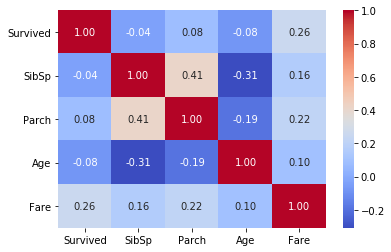

In [28]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(train_df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

* *Fare* appears to be somewhat correlated to the Survival probability.
* Let us dig deeper to find if any hidden insights would turn up.

In [10]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

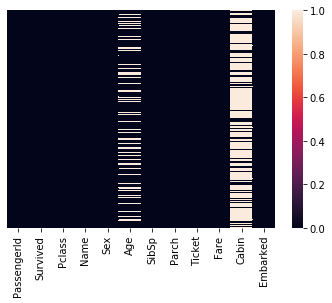

In [23]:
# visualizing the missing data

sns.heatmap(train_df.isnull(), yticklabels=False)

* *Age* and *Cabin* are apparently having missing data.
* *Cabin* has most of the data to be missing.

In [15]:
train_df.isnull().sum() * 100 / len(train_df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

* There are about 
    * 0.2% values to be missing *'Embarked'* column.
    * 20% values to be missing *'Age'* column. 
    * 80% values to be missing *'Cabin'* column.


* Now, let us try to impute the missing values of *'Age'*.
* First, let us visualize the distribution of *Age* data.

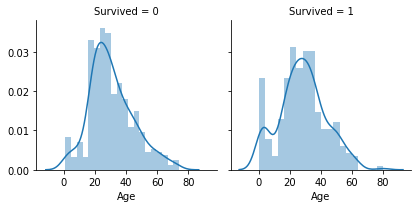

In [26]:
age_plot = sns.FacetGrid(train_df, col='Survived')
age_plot.map(sns.distplot, 'Age', bins=20)

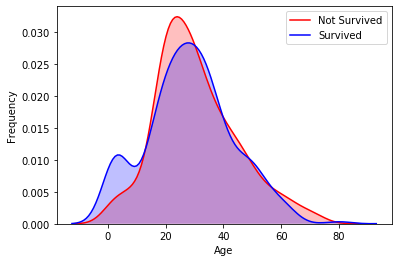

In [27]:
# Explore Age distibution 
g = sns.kdeplot(train_df["Age"][(train_df["Survived"] == 0) & (train_df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_df["Age"][(train_df["Survived"] == 1) & (train_df["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

* We could see a small peak for the younger(nearly of ages <15) ages to survive.
* From the correlation matrix of numerical data, it is evident that the age is not greatly correlated with the survival probability.
* But from the above plots of age, it is perceptible that subpopulation of age (children) have more chances of being survived.
* This is an interesting observation, and thus we should retain age in our data and impute the missing values.
* Let us further continue our data analysis.

### Imputing Missing Data

* Since *'Embarked'* is categorical data, let us impute the missing values using the mode of the column.

In [17]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df.isnull().sum() * 100 / len(train_df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64